# Notebook with sklearn analogues in python for comparsion

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    dataset["data"], dataset["target"], stratify=dataset["target"], test_size=0.3, random_state=0)


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
clf = DecisionTreeClassifier(random_state=0)

In [4]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
y_pred = clf.predict(X_test)

In [6]:
accuracy_score(y_test, y_pred)

0.97777777777777775

In [7]:
f1_score(y_test, y_pred, average="weighted")

0.97775305895439379

# random_state=1 with max_depths=4 will give same tree structure as julia implementation from this repository with random_state=0 on iris datasetm

In [8]:
clf = DecisionTreeClassifier(random_state=1, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

# Run prediction 10 000 times

In [9]:
%%time 
for i in range(10000):
    y_pred = clf.predict(X_test)

CPU times: user 644 ms, sys: 0 ns, total: 644 ms
Wall time: 645 ms


# Tree structure

In [10]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="mytree.dot")


In [11]:
% matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
def print_graph(clf):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

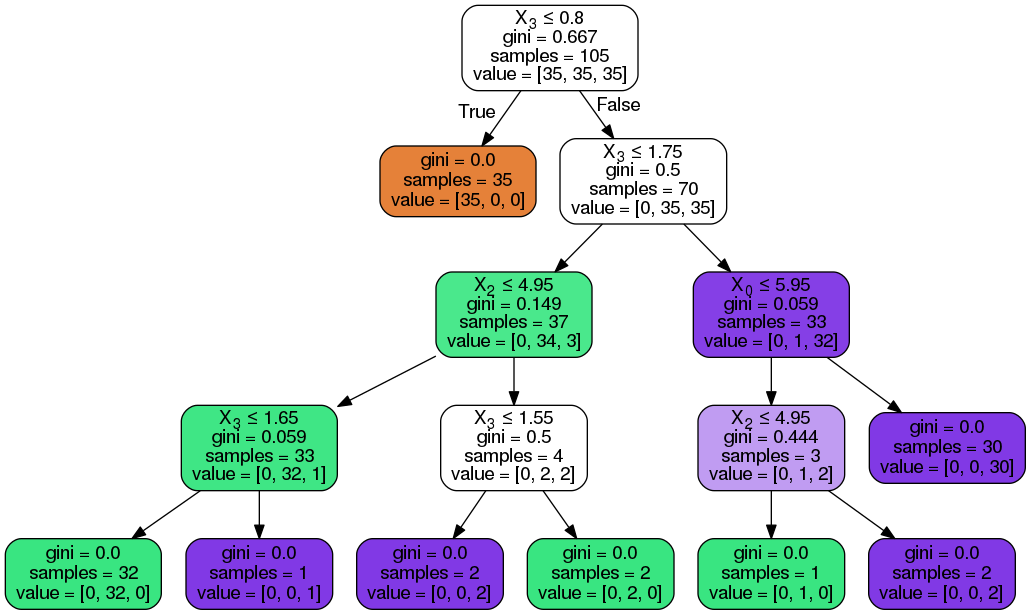

In [12]:
print_graph(clf)